<h1><center>EXPERIMENT 2</center></h1>
<h3>AIM :</h3> To design a densenet for classifying images using fashion MNIST dataset
<br>
<h3>Thoery:</h3>
DenseNet is a deep neural network architecture that has been used successfully in a variety of image classification tasks, including the classification of the Fashion MNIST dataset. In this architecture, each layer is connected to every other layer in a feed-forward fashion, resulting in a dense and highly connected network.

To design a DenseNet for classifying images using the Fashion MNIST dataset, we need to consider several factors:

Input size: The Fashion MNIST images have a resolution of 28x28 pixels and are grayscale, so the input size of our network should be (28, 28, 1).

Depth: The depth of our network, i.e., the number of layers, is an important factor that can affect the performance of the network. A typical DenseNet consists of several dense blocks, each containing multiple convolutional layers, followed by a transition layer that performs pooling and compression to reduce the dimensionality of the feature maps. We can experiment with different numbers of dense blocks and convolutional layers per block to find the optimal depth for our network.

Growth rate: The growth rate determines how many new feature maps are added to the network at each layer. A higher growth rate can lead to better performance but also increases the number of parameters and the computational cost of the network.

Compression factor: The compression factor controls the amount of compression applied to the feature maps in the transition layer. A higher compression factor results in more aggressive compression and a smaller number of feature maps, which can reduce the computational cost of the network.

Activation function: We can experiment with different activation functions, such as ReLU or LeakyReLU, to find the optimal function for our network.

Dropout: We can use dropout regularization to prevent overfitting and improve the generalization performance of our network.

Once we have determined the hyperparameters of our DenseNet, we can train the network using the Fashion MNIST dataset and evaluate its performance on a separate test set. We can also use techniques such as data augmentation and transfer learning to improve the performance of our network and reduce overfitting.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Concatenate, AveragePooling2D, Dense, Flatten
from tensorflow.keras.models import Model

In [4]:
def dense_block(inputs, num_layers, growth_rate):
    x = inputs
    for i in range(num_layers):
        x1 = BatchNormalization()(x)
        x1 = tf.nn.relu(x1)
        x1 = Conv2D(growth_rate, (3, 3), padding='same')(x1)
        x = Concatenate()([x, x1])
    return x

In [5]:

def transition_block(inputs, compression_factor):
    num_filters = int(inputs.shape[-1] * compression_factor)
    x = BatchNormalization()(inputs)
    x = tf.nn.relu(x)
    x = Conv2D(num_filters, (1, 1))(x)
    x = AveragePooling2D((2, 2), strides=1, padding='same')(x)

    return x

In [6]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 1s 0us/step


In [15]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [7]:
# Reshape the data to be 4D arrays (batch size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [8]:
# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [9]:
# Define the DenseNet architecture
inputs = Input(shape=(28, 28, 1))
x = Conv2D(64, (7, 7), strides=2, padding='same')(inputs)
x = BatchNormalization()(x)
x = tf.nn.relu(x)
x = AveragePooling2D((3, 3), strides=2, padding='same')(x)

In [10]:
x = dense_block(x, 6, 32)
x = transition_block(x, 0.5)
x = dense_block(x, 12, 32)
x = transition_block(x, 0.5)
x = dense_block(x, 24, 32)
x = transition_block(x, 0.5)

In [13]:
x = BatchNormalization()(x)
x = tf.nn.relu(x)
x = AveragePooling2D((7, 7), padding='same')(x)
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

In [14]:
model = Model(inputs=inputs, outputs=outputs)


In [15]:
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
# Train the model on the training data
history = model.fit(x_train, y_train, batch_size=128, epochs=2, validation_split=0.1)

Epoch 1/2
422/422 [==============================] - 56s 132ms/step - loss: 0.2555 - accuracy: 0.9059 - val_loss: 0.5443 - val_accuracy: 0.8217
Epoch 2/2
422/422 [==============================] - 57s 135ms/step - loss: 0.2394 - accuracy: 0.9101 - val_loss: 0.3450 - val_accuracy: 0.8838


In [23]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.3733 - accuracy: 0.8748
Test accuracy: 0.8748000264167786


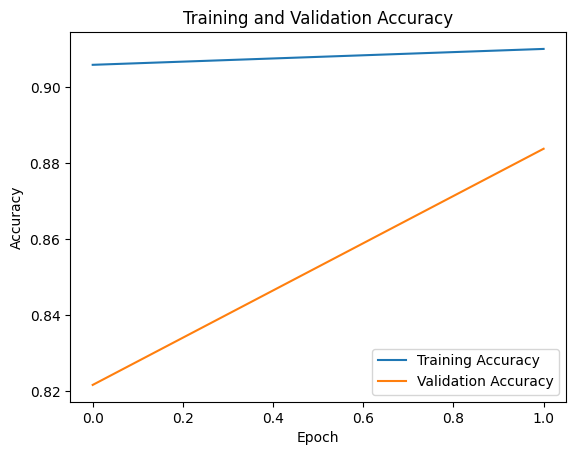

In [24]:
# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


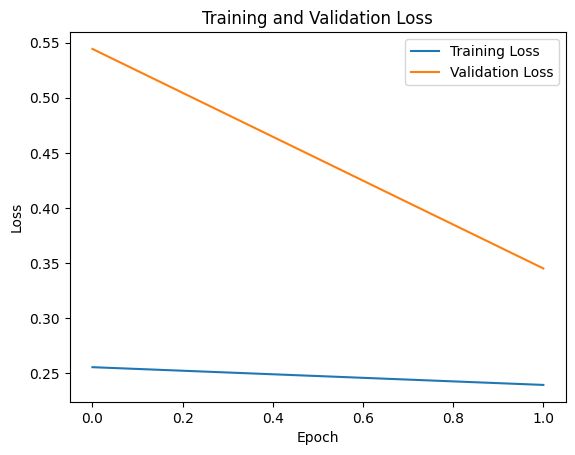

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h3>Conclusion:</h3>
We have successfully designed a densenet for classifying images using the Fashion MNIST dataset.